In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
#Generate random noise in our data
X=np.linspace(0,2,num=20)
Y=np.sin(np.pi*X)
for i in range(len(Y)):
    dummy=random.choice([-1,1])
    Y[i]=Y[i]+(dummy*random.random())/4
    

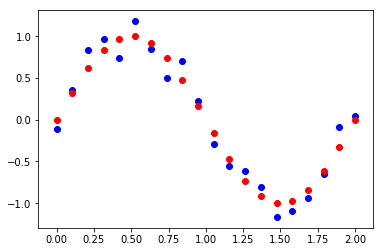

In [4]:
#Visualizing the data
#red points represent sin(pi*x) 
#blue points represent our data( after introducing noise )
plt.scatter(X,Y,c='blue')
plt.scatter(X,np.sin(np.pi*X),c='red')

### When M=1, the program represents linear regression
### When M>1, the program represents polynomial regression

In [5]:
#features cosidering a cubic polynomial for fitting 
#Change M as per requirement
f0= [1]*20
M=3
F=f0

#f1= X
#f2= X**2
#f3= X**3
#F=np.column_stack([f0,f1,f2,f3])
#Generalizing for M degree
for i in range(1,M+1):
    F = np.column_stack([F, X**i])

In [6]:
F

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 7.36842105e-01, 5.42936288e-01, 4.00058318e-01],
       [1.00000000e+00, 8.42105263e-01, 7.09141274e-01, 5.97171599e-01],
       [1.00000000e+00, 9.47368421e-01, 8.97506925e-01, 8.50269719e-01],
       [1.00000000e+00, 1.05263158e+00, 1.10803324e+00, 1.16635078e+00],
       [1.00000000e+00, 1.15789474e+00, 1.34072022e+00, 1.55241289e+00],
       [1.00000000e+00, 1.26315789e+00, 1.59556787e+00, 2.01545415e+00],
       [1.00000000e+00, 1.36842105e+00, 1.87257618e

## Using Normal Equation

In [7]:
#Given data we have, w0f0+w1f1+w2f2+w3f3=y
#Using normal equation, we find W=[w0,w1,w2,w3] 
#Normal eqn: (transpose(F)*F)*W = transpose(F)*(Y(column))
tff=np.matmul(np.transpose(F),F)
tff_inv=np.linalg.inv(tff)
W= np.matmul(np.matmul(tff_inv,np.transpose(F)), Y.reshape(20,1))

In [8]:
W

array([[-0.13925628],
       [ 5.93784759],
       [-8.75538489],
       [ 2.93865934]])

In [9]:
#Making gridlines for visualizing our results
xx=np.linspace(0,2,50)
yy=W[0]
#yy=W[0]*1 + W[1]*xx + W[2]*(xx ** 2) + W[3]*(xx**3)
#Generalizing
for i in range(1,len(W)):
    yy=yy+ W[i]*(xx**i)

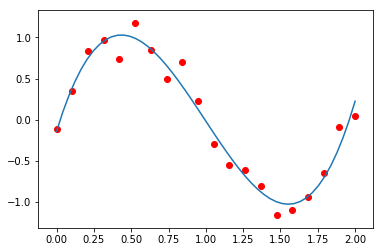

In [10]:
plt.plot(xx,yy)
plt.scatter(X,Y,c='red')

# Using Gradient Descent

In [11]:
#initialize W2
W2=np.ones((M+1,1))

In [12]:
#Calculating Ypredicted
Ypr= np.matmul(F,W2)

In [13]:
#define cost function/ optimization function
costfxn=np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum())

In [14]:
#Gradient Descent step
cost=[costfxn]
for epoch in range(10000):
    Ypr=np.matmul(F,W2)
    W2=W2 - 0.005*np.matmul(np.transpose(F), Ypr-Y.reshape(Ypr.shape))
    cost.append(np.sqrt(((Ypr-Y.reshape(Ypr.shape))**2).sum()))

### Warning
The learning rate 0.005 and the no. of epochs have to e manually selected by trial and error. 
Learning rate must be small enough so that cost doesn't overshoot the minima but big enough for less error within 10000 steps 

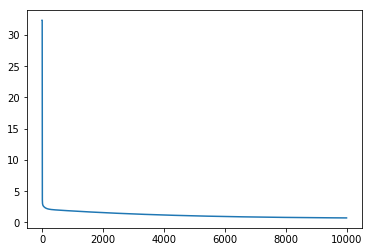

In [15]:
#plotting cost over iteration
plt.plot(np.linspace(1,10001,10001).tolist(),cost)

In [16]:
yy2=0
for i in range(1,len(W2)):
    yy2=yy2+ W2[i]*(xx**i)

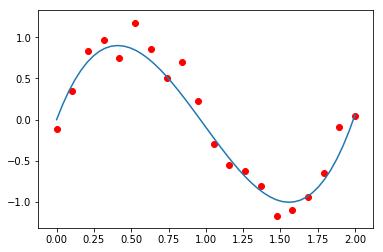

In [17]:
#plotting prediction
plt.plot(xx,yy2)
plt.scatter(X,Y,c='red')

## Lets try on some real data now

In [18]:
import pandas as pd

In [295]:
#Reading the data
fn=['mpg','cylinders','displacement','horsepower','weight','acc','model_year0','origin','carname']
data=pd.read_table('asa',sep=';',header=None ,names=fn)

Here, we have a real dataset in which we shall predict the efficiency of a car engine(in miles per gallon) based on parameters such as
* The number of cylinders
* Displacement
* Horsepower 
* Weight
* Acceleration
and their combinations

Note: This data is taken from the UCI repository's Auto-mpg Dataset. The data has been modified and converted into a txt file with ';' as the delimiter. 
The real data can be found at 
(https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data)

In [296]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acc,model_year0,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


We now drop the useless data first ( the model_year, origin, and the name)

In [297]:
#Removing useless columns
data.drop(labels=['model_year0','origin','carname'],axis=1,inplace=True)

In [298]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acc
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [299]:
#Finding the data types
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acc             float64
dtype: object

#### We see that horsepower which should be a float is actually an object. That means it has some missing values. Lets find out and replace those with outliers

In [300]:
#Finding the outliers
bad_labels = list(data[data.horsepower == '?'].index)

In [301]:
#Dropping the missing values since they are not many. In case of more missing values,
#extrapolate the data or fill them with outliers
data.drop(labels=bad_labels,axis=0,inplace=True)

In [302]:
#Verifying that we have successfully dropped all missing values
data[data.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,acc


### Now that we have all numeric values, lets convert the horsepower column to numeric

In [303]:
#Converting object type to float64 type
data['horsepower']=data['horsepower'].apply(pd.to_numeric)

In [304]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acc             float64
dtype: object

**NOTE** :  Usually, for real world problems, a lot of brainstorming is required for finding what combination of the parameters given will help the model fit most accurately. A combination of these parameters will definitely make the model better and can be added.

Here, we add only a bias column, consisting of all ones. This will ensure that the intercept of the line may be non zero.


In [305]:

#Adding bias column
data['bias'] = [1]*len(data)

In [360]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acc,bias
0,22.0,4,140.0,72.0,2408.0,19.0,1
1,37.0,4,91.0,68.0,2025.0,18.2,1
2,33.0,4,91.0,53.0,1795.0,17.4,1
3,28.0,4,151.0,90.0,2678.0,16.5,1
4,10.0,8,307.0,200.0,4376.0,15.0,1


## Shuffling and splitting the data 

In [307]:
#Shuffling the data
#sample returns 'frac' fraction of the data randomly. Keeping frac=1 means returning the whole data shuffled
#reset_index option resets the indices of the rows so that the first row is still denoted by 0.
data=data.sample(frac=1).reset_index(drop=True)

In [308]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acc,bias
0,22.0,4,140.0,72.0,2408.0,19.0,1
1,37.0,4,91.0,68.0,2025.0,18.2,1
2,33.0,4,91.0,53.0,1795.0,17.4,1
3,28.0,4,151.0,90.0,2678.0,16.5,1
4,10.0,8,307.0,200.0,4376.0,15.0,1


In [361]:
Xtr = data.loc[0:278,'cylinders':'bias']  #Training X values
Xte = data.loc[278:,'cylinders':'bias']   #Testing X values
Ytr = data.loc[0:278,'mpg']             #Training Y values
Yte = data.loc[278:,'mpg']              #Testing Y values


## The refining of the data is finally done

## Training The Model

### Regularization

- Regularization is used to fine tune the data so that it does not under-fit or over-fit the data. It          includes adding penalty to the cost function which depends only on the weights.
- L Regularization is given by :
<img src="https://i2.wp.com/laid.delanover.com/wp-content/uploads/2018/01/reg_formulas.png">

A better explanation is given at (https://www.youtube.com/watch?v=sO4ZirJh9ds)


### we shall use the normal equation and modify it to include lambda in it, to use L-2 regularization
### this equation is derived by taking the first derivative of the new cost function and equating it to 0

In [362]:
 #Normal eqn: (transpose(F)*F + lambda*I)*W = transpose(F)*(Y(column))
lambda1 = 1
lambda2 = 1000
lambda3 = 0
#For lambda = 1
tff1=np.matmul(np.transpose(Xtr),Xtr) + lambda1*np.identity(Xtr.shape[1])
tff1_inv=np.linalg.inv(tff1)
W1= np.matmul(np.matmul(tff1_inv,np.transpose(Xtr)), Ytr)

#For lambda = 1000 
tff2=np.matmul(np.transpose(Xtr),Xtr) + lambda2*np.identity(Xtr.shape[1])
tff2_inv=np.linalg.inv(tff2)
W2= np.matmul(np.matmul(tff2_inv,np.transpose(Xtr)), Ytr)

#For lambda = 0 (No regularization)
tff3=np.matmul(np.transpose(Xtr),Xtr) + lambda3*np.identity(Xtr.shape[1])
tff3_inv=np.linalg.inv(tff3)
W3= np.matmul(np.matmul(tff3_inv,np.transpose(Xtr)), Ytr)

In [363]:
W1

array([ 6.74065062e-01, -1.90216457e-02,  6.83703662e-03, -5.73142140e-03,
        6.01934047e-01,  3.04889046e+01])

In [364]:
W2

array([ 3.38469358e-01, -6.67034293e-02,  1.15759161e-01, -7.26004953e-04,
        1.54637680e+00,  1.67509226e-01])

In [365]:
W3

array([-3.39920623e-01,  3.34908469e-03, -5.47292908e-02, -5.35709206e-03,
       -3.31998434e-02,  4.69611643e+01])

### We can see that as lambda increases, weights get lower in magnitude as the penalty keeps on increasing.

## Testing

In [404]:
#Testing on training data
Ypr1 = np.matmul(Xtr,W1)
Ypr2 = np.matmul(Xtr,W2)
Ypr3 = np.matmul(Xtr,W3)

In [406]:
#Average loss on training data
loss1 = np.sqrt(np.mean(((Ypr1 - Ytr)**2)))
loss2 = np.sqrt(np.mean(((Ypr2 - Ytr)**2)))
loss3 = np.sqrt(np.mean(((Ypr3 - Ytr)**2)))


In [407]:
loss1

4.466543342061013

In [408]:
loss2

20.104963739422566

In [409]:
loss3

4.438968213129565

In [410]:
#Testing on testing data
Ypr1 = np.matmul(Xte,W1)
Ypr2 = np.matmul(Xte,W2)
Ypr3 = np.matmul(Xte,W3)

In [411]:
#Average loss on testing data
loss1 = np.sqrt(np.mean(((Ypr1 - Yte)**2)))
loss2 = np.sqrt(np.mean(((Ypr2 - Yte)**2)))
loss3 = np.sqrt(np.mean(((Ypr3 - Yte)**2)))

In [412]:
loss1

44369.81511249779

In [413]:
loss2

1500.1371509667053

In [414]:
loss3

59708.79579796411

### Whoa! Now thats pretty huge!
### But observe that the case when lambda=1000 gives a lesser testing loss than others but a greater training loss
### Thus, we can conclude that:
- ### For higher lambda our model generalizes more but fits less i.e. it tends to **underfit** our data
- ### For lower lambda our model fits well but generalizes less i.e. it tends to **overfit** the data
- ### Its the trade-off between the two that must be decided by the user to suit his/her needs

### The losses are actually the average values of the euclidean distance of the actual point from the predicted point.

### Lets benchmark our model using sklearn

In [382]:
#Invoking the standard library
from sklearn import linear_model 

In [419]:
reg1 = linear_model.Ridge(alpha=0,fit_intercept=False)
reg2 = linear_model.Ridge(alpha=1,fit_intercept=False)
reg3 = linear_model.Ridge(alpha=1000, fit_intercept=False)

In [420]:
reg1.fit(Xtr,Ytr)
reg2.fit(Xtr,Ytr)
reg3.fit(Xtr,Ytr)

Ridge(alpha=1000, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [421]:
print(reg1.coef_)
print(reg2.coef_)
print(reg3.coef_)

[ -1.69960312   1.29609577  -9.79654306 -18.7016084   -0.55775737
  23.76810036]
[ -2.47459851  -2.98385782  -8.41569854 -13.57930685  -0.53075765
  23.68321429]
[-0.5454808  -0.45106307 -0.35886134 -0.42702673  0.14884175  5.18475371]


In [422]:
print(np.sqrt(np.mean((reg1.predict(Xte) - Yte)**2)))
print(np.sqrt(np.mean((reg2.predict(Xte) - Yte)**2)))
print(np.sqrt(np.mean((reg3.predict(Xte) - Yte)**2)))

59708.795797964005
44369.81511249766
1500.1371509667056


### So thats our average loss from a library as well. That indicates our method is correct